In [1]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "defects_data.csv")
df = pd.read_csv(path_file, header=0)

df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [2]:
df = df.drop(['defect_date', 'defect_id'], axis=1)

In [3]:
df.shape

(1000, 6)

In [4]:
df['severity'].value_counts()

severity
Minor       358
Critical    333
Moderate    309
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == object:
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])

df.head(10)

,product_id,defect_type,defect_location,severity,inspection_method,repair_cost
0,15,2,0,1,2,245.47
1,6,1,0,1,2,26.87
2,84,2,1,1,0,835.81
3,10,1,1,0,0,444.47
4,14,0,0,1,1,823.64
5,17,1,1,2,2,788.11
6,85,0,1,0,1,33.68
7,90,2,1,2,1,65.56
8,30,2,0,0,1,848.61
9,20,2,0,0,2,478.48


In [6]:
X = df[:600].drop('severity', axis=1)
y = df[:600]['severity']
X

,product_id,defect_type,defect_location,inspection_method,repair_cost
0,15,2,0,2,245.47
1,6,1,0,2,26.87
2,84,2,1,0,835.81
3,10,1,1,0,444.47
4,14,0,0,1,823.64
...,...,...,...,...,...
595,74,2,1,0,891.01
596,26,0,1,0,267.51
597,50,1,0,0,151.43
598,36,1,1,1,297.76


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [9]:
df_validate = df[600:]
df_validate

,product_id,defect_type,defect_location,severity,inspection_method,repair_cost
600,46,2,1,2,2,927.75
601,74,0,2,2,2,283.60
602,45,2,2,2,1,919.65
603,100,1,2,0,2,302.29
604,63,1,2,2,0,309.53
...,...,...,...,...,...,...
995,25,2,0,1,0,813.14
996,23,1,0,2,0,944.07
997,17,2,0,1,0,401.12
998,96,0,1,2,1,775.63


In [10]:
X_val, y_val = df_validate.drop('severity', axis=1), df_validate['severity']

In [11]:
X_val.head(), y_val.head()

(     product_id  defect_type  defect_location  inspection_method  repair_cost
 600          46            2                1                  2       927.75
 601          74            0                2                  2       283.60
 602          45            2                2                  1       919.65
 603         100            1                2                  2       302.29
 604          63            1                2                  0       309.53,
 600    2
 601    2
 602    2
 603    0
 604    2
 Name: severity, dtype: int64)

In [12]:
X_val.shape, y_val.shape

((400, 5), (400,))

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5 , weights='distance' , algorithm='auto' , leaf_size=30 , 
                                 p=2 , metric='euclidean' , metric_params=None , n_jobs=None)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [14]:
from sklearn.metrics import accuracy_score

y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia no conjunto de treinamento: {train_accuracy:.2f}')

y_val_pred = knn_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia no conjunto de validação: {val_accuracy:.2f}')

y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de treinamento: 1.00
Acurácia no conjunto de validação: 0.32
Acurácia no conjunto de teste: 0.33


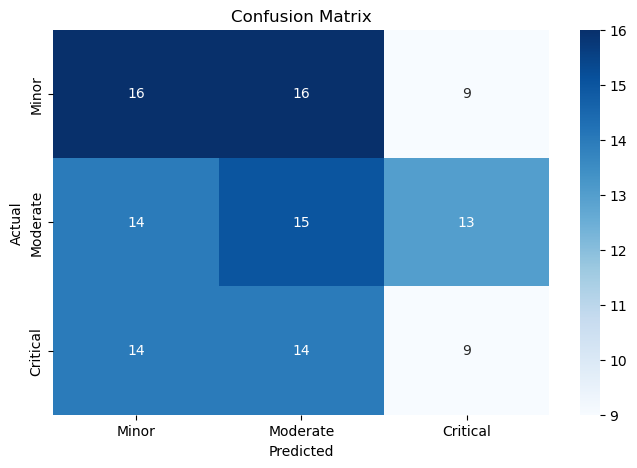

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 5))
class_labels = ['Minor', 'Moderate', 'Critical']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X, y)

print(f'Melhores Hiperparâmetros: {grid_search.best_params_}')
print(f'Melhor Acurácia: {grid_search.best_score_:.2f}')

Melhores Hiperparâmetros: {'metric': 'euclidean', 'n_neighbors': 5}
Melhor Acurácia: 0.36


In [17]:
from sklearn.model_selection import cross_val_score

# Realizar validação cruzada
cv_scores = cross_val_score(knn_model, X, y, cv=5)
print(f'Acurácia média na validação cruzada: {cv_scores.mean():.2f}')

Acurácia média na validação cruzada: 0.36
